Downloading the Dataset

In [ ]:
!gdown --id 1MIKKj8Gi-xUwhsYt6xEV6FSmX0_Le8iL
!unzip -q 'data-storm-20.zip'

Downloading...
From: https://drive.google.com/uc?id=1MIKKj8Gi-xUwhsYt6xEV6FSmX0_Le8iL
To: /content/data-storm-20.zip
100% 1.23M/1.23M [00:00<00:00, 81.9MB/s]


### Preparing Data & Feature Engineering

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [268]:
data_train = pd.read_csv('Hotel-A-train.csv', index_col=0)
data_validation = pd.read_csv('Hotel-A-validation.csv', index_col = 0)

In [269]:
data_train.shape, data_validation.shape

((27499, 23), (2749, 23))

In [270]:
data_train = data_train.append(data_validation)

In [271]:
data_train.shape

(30248, 23)

In [272]:
data_train.head()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
Reservation-id,,,,,,,,,,,,,,,,,,,,,,,
39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,5/21/2015,2,2,0,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,5/26/2015,3,3,0,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,6/29/2015,3,3,0,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,6/20/2015,4,3,0,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,6/20/2015,1,1,0,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


In [273]:
data_train.dtypes

Gender                    object
Age                        int64
Ethnicity                 object
Educational_Level         object
Income                    object
Country_region            object
Hotel_Type                object
Expected_checkin          object
Expected_checkout         object
Booking_date              object
Adults                     int64
Children                   int64
Babies                     int64
Meal_Type                 object
Visted_Previously         object
Previous_Cancellations    object
Deposit_type              object
Booking_channel           object
Required_Car_Parking      object
Reservation_Status        object
Use_Promotion             object
Discount_Rate              int64
Room_Rate                  int64
dtype: object

In [274]:
data_train.describe()

,Age,Adults,Children,Babies,Discount_Rate,Room_Rate
count,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000
mean,43.997388,2.333873,1.743586,0.349940,12.494214,175.009786
std,15.294786,1.177353,0.722228,0.572767,11.202236,43.878472
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000
25%,31.000000,2.000000,1.000000,0.000000,5.000000,137.000000
50%,44.000000,2.000000,2.000000,0.000000,10.000000,174.000000
75%,57.000000,3.000000,2.000000,1.000000,20.000000,214.000000
max,70.000000,5.000000,3.000000,2.000000,40.000000,250.000000


In [275]:
data_train.isnull().sum()

Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [276]:
data_train.columns

Index(['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region', 'Hotel_Type', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Meal_Type',
       'Visted_Previously', 'Previous_Cancellations', 'Deposit_type',
       'Booking_channel', 'Required_Car_Parking', 'Reservation_Status',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [277]:
object_cols = ['Gender', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion']
# these columns need to be onehot encode or vectorise

dates = ['Expected_checkin', 'Expected_checkout', 'Booking_date'] #need to feature engineer

In [278]:
for col in object_cols:
  print(col, pd.unique(data_train[col]))

Gender ['F' 'M']
Ethnicity ['Latino' 'caucasian' 'African American' 'Asian American']
Educational_Level ['Grad' 'Mid-School' 'College' 'High-School']
Income ['<25K' '50K -- 100K' '>100K' '25K --50K']
Country_region ['North' 'East' 'South' 'West']
Hotel_Type ['City Hotel' 'Airport Hotels' 'Resort']
Meal_Type ['BB' 'FB' 'HB']
Visted_Previously ['No' 'Yes']
Previous_Cancellations ['No' 'Yes']
Deposit_type ['No Deposit' 'Refundable' 'Non-Refundable']
Booking_channel ['Online' 'Agent' 'Direct']
Required_Car_Parking ['Yes' 'No']
Reservation_Status ['Check-In' 'Canceled' 'No-Show']
Use_Promotion ['Yes' 'No']


In [279]:
one_hot_encoded_lst = ['Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 
       'Meal_Type', 'Deposit_type', 'Booking_channel'] 

In [280]:
data_train = pd.get_dummies(data_train, columns=one_hot_encoded_lst)

In [281]:
data_train.columns

Index(['Gender', 'Age', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Visted_Previously',
       'Previous_Cancellations', 'Required_Car_Parking', 'Reservation_Status',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'Ethnicity_African American', 'Ethnicity_Asian American',
       'Ethnicity_Latino', 'Ethnicity_caucasian', 'Educational_Level_College',
       'Educational_Level_Grad', 'Educational_Level_High-School',
       'Educational_Level_Mid-School', 'Income_25K --50K',
       'Income_50K -- 100K', 'Income_<25K', 'Income_>100K',
       'Country_region_East', 'Country_region_North', 'Country_region_South',
       'Country_region_West', 'Hotel_Type_Airport Hotels',
       'Hotel_Type_City Hotel', 'Hotel_Type_Resort', 'Meal_Type_BB',
       'Meal_Type_FB', 'Meal_Type_HB', 'Deposit_type_No Deposit',
       'Deposit_type_Non-Refundable', 'Deposit_type_Refundable',
       'Booking_channel_Agent', 'Booking_channel_Direct',
  

In [282]:
data_train['Gender'] = data_train['Gender'].map({'F':0, 'M':1})
data_train['Visted_Previously'] = data_train['Visted_Previously'].map({'No':0, 'Yes':1})
data_train['Previous_Cancellations'] = data_train['Previous_Cancellations'].map({'No':0, 'Yes':1})
data_train['Required_Car_Parking'] = data_train['Required_Car_Parking'].map({'Yes':1, 'No':0})
data_train['Use_Promotion'] = data_train['Use_Promotion'].map({'Yes':1, 'No':0})
# data_train['Reservation_Status'] = data_train['Reservation_Status'].map({'Check-In':1, 'Canceled':2, 'No-Show':3})
data_train['Reservation_Status'] = data_train['Reservation_Status'].map({'Check-In':0, 'Canceled':1, 'No-Show':2})

In [283]:
checkin, canceled, noshow = np.bincount(data_train['Reservation_Status'])
total = checkin + canceled + noshow
print('Examples:\n    Total: {}\n    Check-In: {} ({:.2f}% of total)\n    Canceled: {} ({:.2f}% of total)\n     No-Show: {} ({:.2f}% of total)\n'.format(
    total, checkin, 100 * checkin / total, canceled, 100 * canceled / total, noshow, 100 * noshow / total))

Examples:
    Total: 30248
    Check-In: 22850 (75.54% of total)
    Canceled: 4875 (16.12% of total)
     No-Show: 2523 (8.34% of total)



In [284]:
data_train[dates[0]] = pd.to_datetime(data_train[dates[0]])
data_train[dates[1]] = pd.to_datetime(data_train[dates[1]])
data_train[dates[2]] = pd.to_datetime(data_train[dates[2]])

In [285]:
data_train['Expected_stay'] = (data_train[dates[1]] - data_train[dates[0]]).dt.days
data_train['Expected_stay'].unique()

array([1, 4, 3, 2])

In [286]:
data_train['Booking_to_checkingin'] = (data_train[dates[0]] - data_train[dates[2]]).dt.days

In [287]:
data_train['Month_of_stay'] = data_train[dates[0]].dt.month

In [288]:
weekdayin = data_train[dates[0]].dt.dayofweek
weekdayout = data_train[dates[1]].dt.dayofweek
from pandas import DataFrame

fina = []
for x,y in zip(weekdayin, weekdayout):
  t = []
  if y >= x:
    for i in range(x, y + 1):
      t.append(i)
    if 5 in t or 6 in t:
      fina.append(1)
    else:
      fina.append(0)
  else:
    for i in range(x, 7):
      t.append(i)
    for j in range(0, y + 1):
      t.append(i)
    if 5 in t or 6 in t:
      fina.append(1)
    else:
      fina.append(0)
data_train['weekend_stay'] = DataFrame(fina,columns=['weekend_stay'])['weekend_stay'].values

In [289]:
data_train['Actual_cost'] = data_train['Expected_stay'] * (data_train['Room_Rate']*(100 - data_train['Discount_Rate']))
data_train['Actual_cost'].head()

Reservation-id
39428300    19620
77491756    18500
73747291    47600
67301739    13680
77222321    21780
Name: Actual_cost, dtype: int64

In [290]:
data_train.isnull().sum()

Gender                           0
Age                              0
Expected_checkin                 0
Expected_checkout                0
Booking_date                     0
Adults                           0
Children                         0
Babies                           0
Visted_Previously                0
Previous_Cancellations           0
Required_Car_Parking             0
Reservation_Status               0
Use_Promotion                    0
Discount_Rate                    0
Room_Rate                        0
Ethnicity_African American       0
Ethnicity_Asian American         0
Ethnicity_Latino                 0
Ethnicity_caucasian              0
Educational_Level_College        0
Educational_Level_Grad           0
Educational_Level_High-School    0
Educational_Level_Mid-School     0
Income_25K --50K                 0
Income_50K -- 100K               0
Income_<25K                      0
Income_>100K                     0
Country_region_East              0
Country_region_North

In [291]:
data_train.head()

,Gender,Age,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_25K --50K,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_East,Country_region_North,Country_region_South,Country_region_West,Hotel_Type_Airport Hotels,Hotel_Type_City Hotel,Hotel_Type_Resort,Meal_Type_BB,Meal_Type_FB,Meal_Type_HB,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Expected_stay,Booking_to_checkingin,Month_of_stay,weekend_stay,Actual_cost
Reservation-id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39428300,0,40,2015-07-01,2015-07-02,2015-05-21,2,2,0,0,0,1,0,1,10,218,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,41,7,0,19620
77491756,0,49,2015-07-01,2015-07-02,2015-05-26,3,3,0,0,0,1,0,0,0,185,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,36,7,0,18500
73747291,0,42,2015-07-02,2015-07-06,2015-06-29,3,3,0,0,0,1,0,0,0,119,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,4,3,7,1,47600
67301739,1,25,2015-07-02,2015-07-03,2015-06-20,4,3,0,0,0,1,0,1,5,144,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,12,7,0,13680
77222321,0,62,2015-07-03,2015-07-04,2015-06-20,1,1,0,0,0,0,0,1,10,242,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,13,7,1,21780


In [292]:
def find_correlation(data, threshold=0.85): #removing correlated rows > 0.85
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [293]:
find_correlation(data_train)

['Expected_stay']

In [294]:
 data_train = data_train.drop(dates, 1)

In [295]:
from sklearn.utils import shuffle
for _ in range(1000):
  data_train = shuffle(data_train)

In [296]:
cleaned_df = data_train.copy()

In [297]:
eps = 0.001
cleaned_df['Log Actual_cost'] = np.log(cleaned_df.pop('Actual_cost')+eps)
cleaned_df['Log Room_Rate'] = np.log(cleaned_df.pop('Room_Rate')+eps)

In [298]:
cleaned_df.describe()

,Gender,Age,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_25K --50K,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_East,Country_region_North,Country_region_South,Country_region_West,Hotel_Type_Airport Hotels,Hotel_Type_City Hotel,Hotel_Type_Resort,Meal_Type_BB,Meal_Type_FB,Meal_Type_HB,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Expected_stay,Booking_to_checkingin,Month_of_stay,weekend_stay,Log Actual_cost,Log Room_Rate
count,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000
mean,0.497653,43.997388,2.333873,1.743586,0.349940,0.334336,0.113991,0.713700,0.327989,0.752281,12.494214,0.252909,0.248611,0.247653,0.250827,0.402539,0.197831,0.200145,0.199484,0.285903,0.288350,0.281804,0.143943,0.199121,0.205964,0.397051,0.197864,0.338336,0.331757,0.329906,0.500727,0.202691,0.296582,0.664077,0.082319,0.253604,0.144770,0.288482,0.566748,1.832683,109.895696,6.571079,0.516431,10.066259,5.131498
std,0.500003,15.294786,1.177353,0.722228,0.572767,0.471766,0.317806,0.452039,0.622291,0.431695,11.202236,0.434687,0.432215,0.431656,0.433496,0.490417,0.398371,0.400116,0.399619,0.451851,0.453002,0.449886,0.351038,0.399346,0.404411,0.489295,0.398396,0.473151,0.470852,0.470187,0.500008,0.402011,0.456758,0.472320,0.274855,0.435081,0.351875,0.453064,0.495533,0.984225,76.926047,3.336087,0.499738,0.585590,0.262621
min,0.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000,1.000000,0.000000,8.699515,4.605180
25%,0.000000,31.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,46.000000,4.000000,0.000000,9.615806,4.919988
50%,0.000000,44.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,102.000000,7.000000,1.000000,9.985068,5.159061
75%,1.000000,57.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,20.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,166.000000,9.000000,1.000000,10.540064,5.365981
max,1.000000,70.000000,5.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,40.000000,1.

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

checkin, canceled, noshow = np.bincount(train_df['Reservation_Status'])
total = checkin + canceled + noshow
print('Train Dataframe:\n    Total: {}\n    Check-In: {} ({:.2f}% of total)\n    Canceled: {} ({:.2f}% of total)\n     No-Show: {} ({:.2f}% of total)\n'.format(
    total, checkin, 100 * checkin / total, canceled, 100 * canceled / total, noshow, 100 * noshow / total))

checkin, canceled, noshow = np.bincount(test_df['Reservation_Status'])
total = checkin + canceled + noshow
print('Test Dataframe:\n    Total: {}\n    Check-In: {} ({:.2f}% of total)\n    Canceled: {} ({:.2f}% of total)\n     No-Show: {} ({:.2f}% of total)\n'.format(
    total, checkin, 100 * checkin / total, canceled, 100 * canceled / total, noshow, 100 * noshow / total))

checkin, canceled, noshow = np.bincount(val_df['Reservation_Status'])
total = checkin + canceled + noshow
print('Validation Dataframe:\n    Total: {}\n    Check-In: {} ({:.2f}% of total)\n    Canceled: {} ({:.2f}% of total)\n     No-Show: {} ({:.2f}% of total)\n'.format(
    total, checkin, 100 * checkin / total, canceled, 100 * canceled / total, noshow, 100 * noshow / total))


Train Dataframe:
    Total: 19358
    Check-In: 14620 (75.52% of total)
    Canceled: 3129 (16.16% of total)
     No-Show: 1609 (8.31% of total)

Test Dataframe:
    Total: 6050
    Check-In: 4570 (75.54% of total)
    Canceled: 968 (16.00% of total)
     No-Show: 512 (8.46% of total)

Validation Dataframe:
    Total: 4840
    Check-In: 3660 (75.62% of total)
    Canceled: 778 (16.07% of total)
     No-Show: 402 (8.31% of total)



In [301]:
train_labels = np.array(train_df.pop('Reservation_Status'))
bool_checkin_labels = train_labels == 0
bool_canceled_labels = train_labels == 1
bool_noshow_labels = train_labels == 2
val_labels = np.array(val_df.pop('Reservation_Status'))
test_labels = np.array(test_df.pop('Reservation_Status'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features_not_scaled = np.array(test_df)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features_not_scaled)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (19358,)
Validation labels shape: (4840,)
Test labels shape: (6050,)
Training features shape: (19358, 44)
Validation features shape: (4840, 44)
Test features shape: (6050, 44)


In [302]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


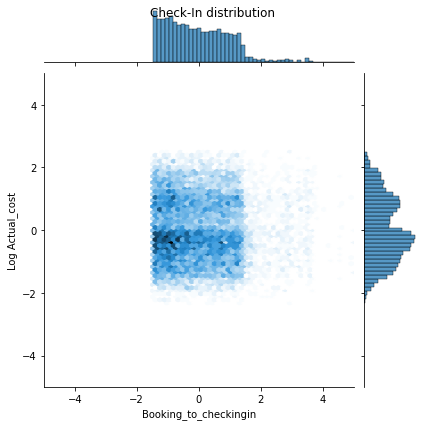

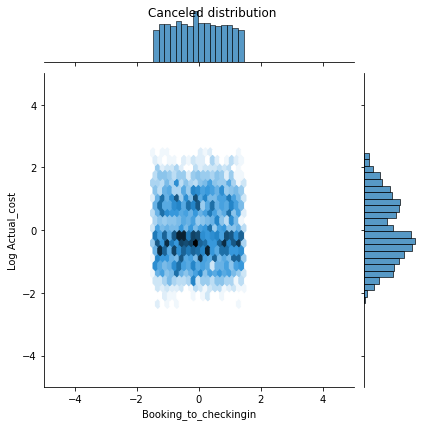

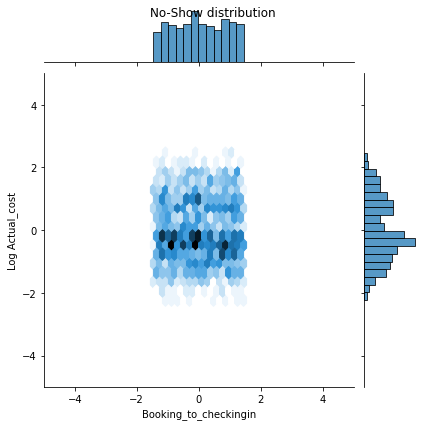

In [ ]:
checkin_df = pd.DataFrame(train_features[ bool_checkin_labels], columns=train_df.columns)
canceled_df = pd.DataFrame(train_features[bool_canceled_labels], columns=train_df.columns)
noshow_df = pd.DataFrame(train_features[bool_noshow_labels], columns=train_df.columns)

sns.jointplot(checkin_df['Booking_to_checkingin'], checkin_df['Log Actual_cost'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Check-In distribution")

sns.jointplot(canceled_df['Booking_to_checkingin'], canceled_df['Log Actual_cost'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Canceled distribution")

sns.jointplot(noshow_df['Booking_to_checkingin'], noshow_df['Log Actual_cost'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("No-Show distribution")

In [303]:
weight_for_0 = (1 / checkin)*(total)/2.0 
weight_for_1 = (1 / canceled)*(total)/2.0
weight_for_2 = (1 / noshow)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))

Weight for class 0: 0.66
Weight for class 1: 3.11
Weight for class 2: 6.02


In [304]:
class_weight

{0: 0.6612021857923497, 1: 3.1105398457583546, 2: 6.019900497512437}

### Trying out Models

#### Dafault Models and Weighted Models

In [305]:
from sklearn.linear_model import LogisticRegression #trying different models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [306]:
classifiers = [['Logistic Regression :', LogisticRegression(max_iter = 1500)],
       ['Decision Tree Classification :', DecisionTreeClassifier(criterion='gini', max_depth=15)],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :', AdaBoostClassifier()],
       ['RandomForest Classification :', RandomForestClassifier()],
       ['RandomForest Classification_Balanced :', RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10, class_weight="balanced")],
       ['RandomForest Classification_Balanced_SubSample :', RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10, class_weight="balanced_subsample")],
       ['RandomForest Classification_Custom_Weighted :', RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10, class_weight=class_weight)],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :', KNeighborsClassifier()],
      #  ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]

for name,model in classifiers:
    model = model
    model.fit(train_features,train_labels)
    predictions = model.predict(val_features)
    print(name,accuracy_score(val_labels,predictions))
    print(confusion_matrix(val_labels,predictions))
    print(classification_report(val_labels,predictions))

Logistic Regression : 0.756198347107438
[[3660    0    0]
 [ 778    0    0]
 [ 402    0    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3660
           1       0.00      0.00      0.00       778
           2       0.00      0.00      0.00       402

    accuracy                           0.76      4840
   macro avg       0.25      0.33      0.29      4840
weighted avg       0.57      0.76      0.65      4840



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classification : 0.6566115702479339
[[3034  448  178]
 [ 606  115   57]
 [ 302   71   29]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      3660
           1       0.18      0.15      0.16       778
           2       0.11      0.07      0.09       402

    accuracy                           0.66      4840
   macro avg       0.35      0.35      0.35      4840
weighted avg       0.62      0.66      0.64      4840

Gradient Boosting Classification : 0.756198347107438
[[3660    0    0]
 [ 778    0    0]
 [ 402    0    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3660
           1       0.00      0.00      0.00       778
           2       0.00      0.00      0.00       402

    accuracy                           0.76      4840
   macro avg       0.25      0.33      0.29      4840
weighted avg       0.57      0.76      0.65      4840



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ada Boosting Classification : 0.756198347107438
[[3660    0    0]
 [ 778    0    0]
 [ 402    0    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3660
           1       0.00      0.00      0.00       778
           2       0.00      0.00      0.00       402

    accuracy                           0.76      4840
   macro avg       0.25      0.33      0.29      4840
weighted avg       0.57      0.76      0.65      4840



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest Classification : 0.756198347107438
[[3659    1    0]
 [ 776    1    1]
 [ 402    0    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3660
           1       0.50      0.00      0.00       778
           2       0.00      0.00      0.00       402

    accuracy                           0.76      4840
   macro avg       0.42      0.33      0.29      4840
weighted avg       0.65      0.76      0.65      4840

RandomForest Classification_Balanced : 0.7483471074380166
[[3593   60    7]
 [ 747   28    3]
 [ 391   10    1]]
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      3660
           1       0.29      0.04      0.06       778
           2       0.09      0.00      0.00       402

    accuracy                           0.75      4840
   macro avg       0.38      0.34      0.31      4840
weighted avg       0.63      0.75      0.66      4840

RandomForest Classific

In [327]:
model = DecisionTreeClassifier(criterion='gini', max_depth=15)
model.fit(train_features,train_labels)
predictions = model.predict(test_features)
print(accuracy_score(test_labels,predictions))
print(confusion_matrix(test_labels,predictions))
print(classification_report(test_labels,predictions))

0.5917355371900826
[[3315 1240   15]
 [ 704  262    2]
 [ 371  138    3]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      4570
           1       0.16      0.27      0.20       968
           2       0.15      0.01      0.01       512

    accuracy                           0.59      6050
   macro avg       0.35      0.33      0.32      6050
weighted avg       0.61      0.59      0.59      6050



#### Oversampling

In [343]:
checkin_features = train_features[bool_checkin_labels]
canceled_features = train_features[bool_canceled_labels]
noshow_features = train_features[bool_noshow_labels]

checkin_labels = train_labels[bool_checkin_labels]
canceled_labels = train_labels[bool_canceled_labels]
noshow_labels = train_labels[bool_noshow_labels]

In [344]:
ids = np.arange(len(canceled_features))
choices = np.random.choice(ids, len(checkin_features))
print(ids)
res_canceled_features = canceled_features[choices]
res_canceled_labels = canceled_labels[choices]

res_canceled_features.shape

[   0    1    2 ... 3126 3127 3128]


(14620, 44)

In [345]:
ids = np.arange(len(noshow_features))
choices = np.random.choice(ids, len(checkin_features))
print(ids)
res_noshow_features = noshow_features[choices]
res_noshow_labels = noshow_labels[choices]

res_noshow_features.shape

[   0    1    2 ... 1606 1607 1608]


(14620, 44)

In [346]:
resampled_features = np.concatenate([res_noshow_features, res_canceled_features, checkin_features], axis=0)
resampled_labels = np.concatenate([res_noshow_labels, res_canceled_labels, checkin_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(43860, 44)

In [347]:
classifiers = [['Logistic Regression :', LogisticRegression(max_iter = 1500)],
       ['Decision Tree Classification :', DecisionTreeClassifier(criterion='gini', max_depth=15) ],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :', AdaBoostClassifier()],
       ['RandomForest Classification :', RandomForestClassifier()],
       ['RandomForest Classification_Balanced :', RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10, class_weight="balanced")],
       ['RandomForest Classification_Balanced_SubSample :', RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10, class_weight="balanced_subsample")],
       ['RandomForest Classification_Custom_Weighted :', RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10, class_weight=class_weight)],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :', KNeighborsClassifier()],
      #  ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]

for name,model in classifiers:
    model = model
    model.fit(resampled_features,resampled_labels)
    predictions = model.predict(val_features)
    print(name,accuracy_score(val_labels,predictions))
    print(confusion_matrix(val_labels,predictions))
    print(classification_report(val_labels,predictions))

Logistic Regression : 0.5183884297520661
[[2132  615  913]
 [ 309  214  255]
 [ 149   90  163]]
              precision    recall  f1-score   support

           0       0.82      0.58      0.68      3660
           1       0.23      0.28      0.25       778
           2       0.12      0.41      0.19       402

    accuracy                           0.52      4840
   macro avg       0.39      0.42      0.37      4840
weighted avg       0.67      0.52      0.57      4840

Decision Tree Classification : 0.5
[[2081  852  727]
 [ 342  232  204]
 [ 178  117  107]]
              precision    recall  f1-score   support

           0       0.80      0.57      0.66      3660
           1       0.19      0.30      0.23       778
           2       0.10      0.27      0.15       402

    accuracy                           0.50      4840
   macro avg       0.37      0.38      0.35      4840
weighted avg       0.64      0.50      0.55      4840

Gradient Boosting Classification : 0.479752066115702

In [348]:
model = GradientBoostingClassifier()
model.fit(resampled_features,resampled_labels)
predictions = model.predict(test_features)
print(accuracy_score(test_labels,predictions))
print(confusion_matrix(test_labels,predictions))
print(classification_report(test_labels,predictions))

0.3943801652892562
[[1817 2753    0]
 [ 399  569    0]
 [ 196  316    0]]
              precision    recall  f1-score   support

           0       0.75      0.40      0.52      4570
           1       0.16      0.59      0.25       968
           2       0.00      0.00      0.00       512

    accuracy                           0.39      6050
   macro avg       0.30      0.33      0.26      6050
weighted avg       0.59      0.39      0.43      6050



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Multi Model *Experiment*

In [ ]:
train1_df, train2_df = train_test_split(cleaned_df, test_size=0.2)
train3_df, train1_df = train_test_split(train1_df, test_size=0.25)
train3_df, combined_val_df = train_test_split(train3_df, test_size=0.3)

checkin, canceled, noshow = np.bincount(train1_df['Reservation_Status'])
total = checkin + canceled + noshow
print('Train 1 Dataframe:\n    Total: {}\n    Check-In: {} ({:.2f}% of total)\n    Canceled: {} ({:.2f}% of total)\n     No-Show: {} ({:.2f}% of total)\n'.format(
    total, checkin, 100 * checkin / total, canceled, 100 * canceled / total, noshow, 100 * noshow / total))

checkin, canceled, noshow = np.bincount(train2_df['Reservation_Status'])
total = checkin + canceled + noshow
print('Train 2 Dataframe:\n    Total: {}\n    Check-In: {} ({:.2f}% of total)\n    Canceled: {} ({:.2f}% of total)\n     No-Show: {} ({:.2f}% of total)\n'.format(
    total, checkin, 100 * checkin / total, canceled, 100 * canceled / total, noshow, 100 * noshow / total))

checkin, canceled, noshow = np.bincount(train3_df['Reservation_Status'])
total = checkin + canceled + noshow
print('Train 3 Dataframe:\n    Total: {}\n    Check-In: {} ({:.2f}% of total)\n    Canceled: {} ({:.2f}% of total)\n     No-Show: {} ({:.2f}% of total)\n'.format(
    total, checkin, 100 * checkin / total, canceled, 100 * canceled / total, noshow, 100 * noshow / total))

checkin, canceled, noshow = np.bincount(combined_val_df['Reservation_Status'])
total = checkin + canceled + noshow
print('Validation Dataframe:\n    Total: {}\n    Check-In: {} ({:.2f}% of total)\n    Canceled: {} ({:.2f}% of total)\n     No-Show: {} ({:.2f}% of total)\n'.format(
    total, checkin, 100 * checkin / total, canceled, 100 * canceled / total, noshow, 100 * noshow / total))


Train 1 Dataframe:
    Total: 6050
    Check-In: 4555 (75.29% of total)
    Canceled: 985 (16.28% of total)
     No-Show: 510 (8.43% of total)

Train 2 Dataframe:
    Total: 6050
    Check-In: 4617 (76.31% of total)
    Canceled: 953 (15.75% of total)
     No-Show: 480 (7.93% of total)

Train 3 Dataframe:
    Total: 12703
    Check-In: 9576 (75.38% of total)
    Canceled: 2047 (16.11% of total)
     No-Show: 1080 (8.50% of total)

Validation Dataframe:
    Total: 5445
    Check-In: 4102 (75.34% of total)
    Canceled: 890 (16.35% of total)
     No-Show: 453 (8.32% of total)



In [ ]:
train1_labels = np.array(train1_df.pop('Reservation_Status'))
train2_labels = np.array(train2_df.pop('Reservation_Status'))
train3_labels = np.array(train3_df.pop('Reservation_Status'))
combined_val_labels = np.array(combined_val_df.pop('Reservation_Status'))

train1_features = np.array(train1_df)
train2_features = np.array(train2_df)
train3_features = np.array(train3_df)
combined_val_features = np.array(combined_val_df)

In [ ]:
combined_scaler = StandardScaler()

train1_features = combined_scaler.fit_transform(train1_features)
train2_features = combined_scaler.transform(train2_features)
train3_features = combined_scaler.transform(train3_features)
combined_val_features = combined_scaler.transform(combined_val_features)

train1_features = np.clip(train1_features, -5, 5)
train2_features = np.clip(train2_features, -5, 5)
train3_features = np.clip(train3_features, -5, 5)
combined_val_features = np.clip(combined_val_features, -5, 5)


print('Train 1 labels shape:', train1_labels.shape)
print('Tran 2 labels shape:', train2_labels.shape)
print('Tran 3 labels shape:', train3_labels.shape)
print('Validation labels shape:', combined_val_labels.shape)

print('Train 1 features shape:', train1_features.shape)
print('Train 2 features shape:', train2_features.shape)
print('Train 3 features shape:', train3_features.shape)
print('Validation features shape:', combined_val_features.shape)

Train 1 labels shape: (6050,)
Tran 2 labels shape: (6050,)
Tran 3 labels shape: (12703,)
Validation labels shape: (5445,)
Train 1 features shape: (6050, 44)
Train 2 features shape: (6050, 44)
Train 3 features shape: (12703, 44)
Validation features shape: (5445, 44)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.85)
print(pca.fit(train3_features))
train1_features = pca.transform(train1_features)
train2_features = pca.transform(train2_features)
train3_features = pca.transform(train3_features)
combined_val_features = pca.transform(combined_val_features)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [ ]:
print('Train 1 features shape:', train1_features.shape)
print('Train 2 features shape:', train2_features.shape)
print('Train 3 features shape:', train3_features.shape)
print('Validation features shape:', combined_val_features.shape)

Train 1 features shape: (6050, 27)
Train 2 features shape: (6050, 27)
Train 3 features shape: (12703, 27)
Validation features shape: (5445, 27)


In [ ]:
model1 = DecisionTreeClassifier(criterion='gini', max_depth=15)
model1.fit(train1_features,train1_labels)
predictions1 = model1.predict(train3_features)

In [ ]:
model2 = DecisionTreeClassifier(criterion='gini', max_depth=15)
model2.fit(train2_features,train2_labels)
predictions2 = model2.predict(train3_features)

In [183]:
with_pred_train3_df = pd.DataFrame(train3_features)
with_pred_train3_df['Pred1'] = pd.DataFrame(predictions1.tolist(),columns=['Pred1'])['Pred1'].values
with_pred_train3_df['Pred2'] = pd.DataFrame(predictions1.tolist(),columns=['Pred2'])['Pred2'].values
with_pred_train3_features = np.array(with_pred_train3_df)

In [184]:
with_pred_train3_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,Pred1,Pred2
0,1.743538,-0.073263,1.578705,1.989729,-1.096756,-1.209849,1.362532,0.534978,0.603848,0.834226,0.509155,0.231412,1.778092,0.104661,2.154591,0.434750,0.464224,2.287670,2.108385,-0.737617,-1.022381,1.768095,0.302201,-0.516785,0.237921,-1.885017,-0.774289,1,1
1,2.936450,-1.010531,-1.010225,1.260813,-2.309302,1.162262,-1.722350,0.526805,-0.197895,-0.218268,-0.058498,2.019198,-1.512083,0.718173,-0.389744,0.967093,-0.702498,0.541295,-0.350920,-0.381413,0.061956,-0.155382,-0.272263,-0.297055,-0.650215,2.213010,1.260063,0,0
2,-1.121777,-1.506487,-1.014178,-0.877869,-1.219932,1.683273,-1.755608,0.771246,0.342640,0.278300,0.632368,2.066685,0.451572,-0.667667,1.226439,-0.472791,0.781020,-0.054748,-0.120941,0.109675,-0.251730,-0.571252,-0.159228,-0.201572,-1.195371,0.065299,0.875187,0,0
3,-1.988645,2.313518,0.451894,1.785800,-0.300149,-1.107873,-0.675154,-1.720735,0.206842,1.281983,-1.833006,-0.088107,2.189834,-0.215725,-1.077867,1.193750,0.354155,0.674725,0.512948,0.980588,2.430310,-0.327471,-0.486894,0.062219,-0.218492,0.721367,-1.583434,0,0
4,0.495237,1.495795,0.547655,0.802627,-0.167349,2.209049,-0.132513,-1.226987,-1.295225,0.140029,-2.001022,-0.760563,-1.285033,-1.124923,0.261427,-1.070725,-1.013117,-0.696434,1.147069,1.545472,2.185111,-1.184434,3.427343,0.300642,0.203500,-0.202991,0.719106,0,0


In [185]:
with_pred_val_df = pd.DataFrame(combined_val_features)
with_pred_val_df['Pred1'] = pd.DataFrame(model1.predict(combined_val_features).tolist(),columns=['Pred1'])['Pred1'].values
with_pred_val_df['Pred2'] = pd.DataFrame(model2.predict(combined_val_features),columns=['Pred2'])['Pred2'].values
with_pred_val_features = np.array(with_pred_val_df)

In [186]:
model3 = DecisionTreeClassifier(criterion='gini', max_depth=15)
model3.fit(with_pred_train3_features,train3_labels)
predictions = model3.predict(with_pred_val_features)
print(accuracy_score(combined_val_labels,predictions))
print(confusion_matrix(combined_val_labels,predictions))
print(classification_report(combined_val_labels,predictions))

0.708356290174472
[[3753  249  100]
 [ 776   82   32]
 [ 392   39   22]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      4102
           1       0.22      0.09      0.13       890
           2       0.14      0.05      0.07       453

    accuracy                           0.71      5445
   macro avg       0.38      0.35      0.34      5445
weighted avg       0.62      0.71      0.65      5445



In [187]:
testing_features = test_features_not_scaled.copy()
testing_features = combined_scaler.transform(testing_features)
testing_features = np.clip(testing_features, -5, 5)
testing_features = pca.transform(testing_features)
testing_labels = test_labels.copy()

with_pred_test_df = pd.DataFrame(testing_features)
with_pred_test_df['Pred1'] = pd.DataFrame(model1.predict(testing_features).tolist(),columns=['Pred1'])['Pred1'].values
with_pred_test_df['Pred2'] = pd.DataFrame(model2.predict(testing_features),columns=['Pred2'])['Pred2'].values
with_pred_test_features = np.array(with_pred_test_df)
predictions = model3.predict(with_pred_test_features)
print(accuracy_score(testing_labels,predictions))
print(confusion_matrix(testing_labels,predictions))
print(classification_report(testing_labels,predictions))

0.7479338842975206
[[4277  198   74]
 [ 771  192   28]
 [ 427   27   56]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      4549
           1       0.46      0.19      0.27       991
           2       0.35      0.11      0.17       510

    accuracy                           0.75      6050
   macro avg       0.53      0.41      0.43      6050
weighted avg       0.69      0.75      0.70      6050



In [188]:
def predict_combined_model(features):
  features = features.copy()
  with_pred_df = pd.DataFrame(features)
  with_pred_df['Pred1'] = pd.DataFrame(model1.predict(features).tolist(),columns=['Pred1'])['Pred1'].values
  with_pred_df['Pred2'] = pd.DataFrame(model2.predict(features),columns=['Pred2'])['Pred2'].values
  with_pred_features = np.array(with_pred_df)
  predictions = model3.predict(with_pred_features)
  return predictions

#### LGBM with bayesian Optimization

In [189]:
# !pip install bayesian-optimization

In [190]:
# #LGBMClassifier
# from sklearn.model_selection import StratifiedKFold
# from lightgbm import LGBMClassifier

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# def lgbm_evaluate(**params):
# #     warnings.simplefilter('ignore')
    
#     params['num_leaves'] = int(params['num_leaves'])
#     params['max_depth'] = int(params['max_depth'])
        
#     clf = LGBMClassifier(**params, n_estimators=20000, nthread=-1)

#     test_pred_proba = np.zeros((x_train.shape[0], 3))
    
#     for n_fold, (train_idx, valid_idx) in enumerate(folds.split(x_train, y_train)):
#         X_train_bo, X_valid = x_train.iloc[train_idx], x_train.iloc[valid_idx]
#         y_train_bo, y_valid = y_train.iloc[train_idx], y_train.iloc[valid_idx]
        
#         model = LGBMClassifier(**params, n_estimators = 10000, n_jobs = -1)
#         model.fit(X_train_bo, y_train_bo, 
#                 eval_set=[(X_train_bo, y_train_bo), (X_valid, y_valid)], eval_metric='binary_logloss',
#                 verbose=False, early_stopping_rounds=200)

#         y_pred_valid = model.predict_proba(X_valid)

#         test_pred_proba[valid_idx] = y_pred_valid

#     return accuracy_score(y_valid, y_pred_valid.argmax(1))

In [191]:
# #hyper parameter tuning
# params = {'colsample_bytree': (0.6, 1),
#      'learning_rate': (.001, .08), 
#       'num_leaves': (8, 124), 
#       'subsample': (0.6, 1), 
#       'max_depth': (3, 25), 
#       'reg_alpha': (.05, 15.0), 
#       'reg_lambda': (.05, 15.0), 
#       'min_split_gain': (.001, .03),
#       'min_child_weight': (12, 80)}

# from sklearn.model_selection import StratifiedKFold
# n_fold = 20
# folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=11)

# from bayes_opt import BayesianOptimization
# bo = BayesianOptimization(lgbm_evaluate, params)
# bo.maximize(init_points=5, n_iter=5)

#### Tensorflow Model

In [192]:
# import numpy as np
# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras import optimizers
# import tensorflow as tf

In [193]:
# y_train = tf.keras.utils.to_categorical(y_train, 3)
# y_test = tf.keras.utils.to_categorical(y_test, 3)

In [194]:
# model = Sequential()

# model.add(Flatten())

# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128))
# model.add(Activation('relu'))

# model.add(Dense(4))
# model.add(Activation('softmax'))

# model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizers.SGD(lr = 0.0001 , momentum = 0.1), metrics=["accuracy"])

In [195]:
# model.fit( x_train, y_train,
#                     epochs = 10,
#                     batch_size = 20,
#                     validation_data = (x_test, y_test))
# model.summary()

In [196]:
# predictions = model.predict([x_test])

In [197]:
# predictions = list(np.argmax(predictions[x]) for x in range(len(predictions)))

In [198]:
# predictions.count(1), predictions.count(2), predictions.count(3)

### **Submission**

In [349]:
def prepare_dataset(df, one_hot_encoded_lst, dates, scaler, pca):
  df = pd.get_dummies(df, columns=one_hot_encoded_lst)

  df['Gender'] = df['Gender'].map({'F':0, 'M':1})
  df['Visted_Previously'] = df['Visted_Previously'].map({'No':0, 'Yes':1})
  df['Previous_Cancellations'] = df['Previous_Cancellations'].map({'No':0, 'Yes':1})
  df['Required_Car_Parking'] = df['Required_Car_Parking'].map({'Yes':1, 'No':0})
  df['Use_Promotion'] = df['Use_Promotion'].map({'Yes':1, 'No':0})

  df[dates[0]] = pd.to_datetime(df[dates[0]])
  df[dates[1]] = pd.to_datetime(df[dates[1]])
  df[dates[2]] = pd.to_datetime(df[dates[2]])

  df['Expected_stay'] = (df[dates[1]] - df[dates[0]]).dt.days
  df['Booking_to_checkingin'] = (df[dates[0]] - df[dates[2]]).dt.days
  df['Month_of_stay'] = df[dates[0]].dt.month

  weekdayin = df[dates[0]].dt.dayofweek
  weekdayout = df[dates[1]].dt.dayofweek
  from pandas import DataFrame

  fina = []
  for x,y in zip(weekdayin, weekdayout):
    t = []
    if y >= x:
      for i in range(x, y + 1):
        t.append(i)
      if 5 in t or 6 in t:
        fina.append(1)
      else:
        fina.append(0)
    else:
      for i in range(x, 7):
        t.append(i)
      for j in range(0, y + 1):
        t.append(i)
      if 5 in t or 6 in t:
        fina.append(1)
      else:
        fina.append(0)
  df['weekend_stay'] = DataFrame(fina,columns=['weekend_stay'])['weekend_stay'].values
  df['Actual_cost'] = df['Expected_stay'] * (df['Room_Rate']*(100 - df['Discount_Rate']))
  df = df.drop(dates, 1)

  eps = 0.001
  df['Log Actual_cost'] = np.log(df.pop('Actual_cost')+eps)
  df['Log Room_Rate'] = np.log(df.pop('Room_Rate')+eps)

  features = np.array(df)
  if scaler:
    print('Scaling ......')
    features = scaler.transform(features)
    features = np.clip(features, -5, 5)
  if pca:
    print('Using PCA ......')
    features = pca.transform(features)
  
  return features

In [350]:
data_submission = pd.read_csv('Hotel-A-test.csv', index_col=0)

In [351]:
data_submission.head()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate
Reservation-id,,,,,,,,,,,,,,,,,,,,,,
62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,11/18/2016,11/19/2016,10/28/2016,3,3,0,HB,No,No,No Deposit,Direct,Yes,Yes,10,153
70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,11/18/2016,11/19/2016,8/6/2016,2,1,0,FB,No,No,No Deposit,Online,No,No,0,210
4230648,F,28,Asian American,Grad,<25K,East,City Hotel,4/28/2017,5/1/2017,4/8/2017,2,2,0,BB,No,No,No Deposit,Agent,No,Yes,5,117
25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,11/18/2016,11/20/2016,5/20/2016,1,3,2,FB,No,No,No Deposit,Online,Yes,Yes,10,107
80931528,M,45,African American,College,25K --50K,South,City Hotel,11/18/2016,11/20/2016,10/31/2016,3,1,0,BB,No,No,Refundable,Agent,No,No,0,119


In [352]:
submission_features = prepare_dataset(data_submission, one_hot_encoded_lst, dates, scaler=None, pca=None)

In [353]:
submission_predictions = model.predict(submission_features)

In [354]:
# submission_predictions = predict_combined_model(submission_features)

In [355]:
submission_predictions = submission_predictions.tolist()
submission_predictions = [x + 1 for x in submission_predictions]
submission_predictions.count(1), submission_predictions.count(2), submission_predictions.count(3)

(1411, 1429, 1478)

In [356]:
print(submission_predictions)

[2, 3, 1, 3, 1, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 1, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 2, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 2, 3, 1, 3, 3, 2, 1, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2, 1, 3, 3, 2, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 1, 3, 1, 2, 3, 3, 3, 2, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2, 1, 1, 3, 2, 1, 3, 3, 2, 3, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 2, 1, 3, 3, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 1, 3, 1, 2, 2, 2, 2, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 1, 3, 2, 3, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2, 1, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 1, 2, 1, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 1, 2, 3, 3, 

In [357]:
col_drop = data_submission.columns.tolist()

In [358]:
submission = data_submission.drop(col_drop, 1)

In [359]:
submission['Reservation_status'] = DataFrame(submission_predictions,columns=['Reservation_status'])['Reservation_status'].values

In [360]:
submission.head()

,Reservation_status
Reservation-id,
62931593,2
70586099,3
4230648,1
25192322,3
80931528,1


In [361]:
submission.to_csv('gradientboost_noscaler_oversampled.csv')

In [223]:
file_df = pd.read_csv('/content/submission2-day1.csv')
print(file_df['Reservation_status'].value_counts())

1    2831
2     969
3     518
Name: Reservation_status, dtype: int64


In [224]:
def compare_submissions(file1, file2 = '/content/submission2-day1.csv'):
  file1_df = pd.read_csv(file1)
  file2_df = pd.read_csv(file2)
  file1_results = np.array(file1_df['Reservation_status'])
  print(file1_df['Reservation_status'].value_counts())
  print(len(file1_results))
  file2_results = np.array(file2_df['Reservation_status'])
  return np.sum(file1_results == file2_results)

In [225]:
compare_submissions(file1='/content/submission-2-day3.csv')

1    4131
2     164
3      23
Name: Reservation_status, dtype: int64
4318


2769

In [226]:
compare_submissions(file1='/content/submission-2-day3-pca-decisiontree.csv')

1    3782
2     368
3     168
Name: Reservation_status, dtype: int64
4318


2650

In [227]:
compare_submissions(file1='/content/submission-2-day3-pca.csv')

1    3782
2     368
3     168
Name: Reservation_status, dtype: int64
4318


2650

In [228]:
compare_submissions(file1='/content/submission-1-day3.csv')

1    3946
2     315
3      57
Name: Reservation_status, dtype: int64
4318


2724

In [250]:
compare_submissions(file1='/content/decisiontree.csv')

1    2865
2     856
3     597
Name: Reservation_status, dtype: int64
4318


2256

In [265]:
compare_submissions(file1='/content/decisiontree_with_params.csv')

1    3357
2     608
3     353
Name: Reservation_status, dtype: int64
4318


2490

In [326]:
compare_submissions(file1='/content/decisiontree_noscaler.csv')

1    2895
2     910
3     513
Name: Reservation_status, dtype: int64
4318


2295

In [341]:
compare_submissions(file1='/content/decisiontree_noscaler_with_params.csv')

1    3307
2     668
3     343
Name: Reservation_status, dtype: int64
4318


2453

In [342]:
compare_submissions(file1='/content/submission-2-day3_Bimsara.csv')

1    3480
2     593
3     245
Name: Reservation_status, dtype: int64
4318


2539

In [362]:
compare_submissions(file1='/content/gradientboost_noscaler_oversampled.csv')

3    1478
2    1429
1    1411
Name: Reservation_status, dtype: int64
4318


1646

In [364]:
compare_submissions(file1='/content/submission-2-day3_Bimsara3.csv')

1    3042
2     817
3     459
Name: Reservation_status, dtype: int64
4318


2304